In [1]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Asc.csv', header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [3]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
df.sort_values(by='x', inplace=True)

In [5]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


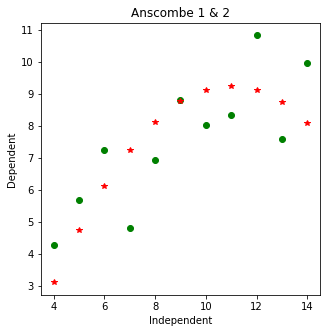

In [6]:
pl.figure(figsize=(5,5))
pl.plot(df['x'], df['y1'], 'go')
pl.plot(df['x'], df['y2'], 'r*')
pl.xlabel('Independent')
pl.ylabel('Dependent')
pl.title('Anscombe 1 & 2');

# First Anscombe distribution: y1

## OLS linear fit  y1~x

In [7]:
OLS1 = smf.ols(formula='y1  ~ x', data=df).fit()
OLS1.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00217
Time:                        20:33:12   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026         0.456     5.544
x              0.5001      0.118      4.241      0.002         0.233     0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

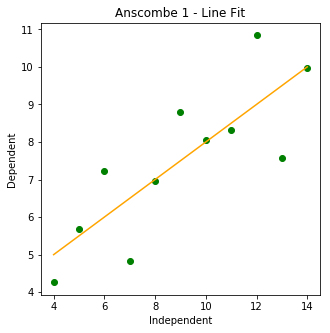

In [8]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Dependent')
pl.title('Anscombe 1 - Line Fit');

## OLS quadratic fit  y1~x^2 + x

In [9]:
# create a new feature for x^2
df['x2'] = df['x']**2

In [10]:
OLS2 = smf.ols(formula='y1 ~ x2 + x',data=df).fit()
OLS2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00956
Time:                        20:33:12   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824        -6.827     8.338
x2            -0.0316      0.043     -0.729      0.487        -0.132     0.068
x              1.0693      0.790      1.354      0.213        -0.752     2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

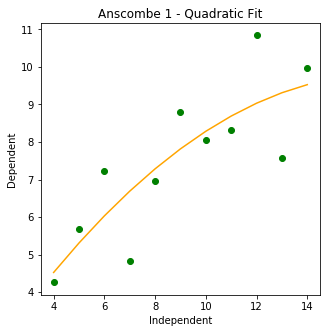

In [11]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Dependent')
pl.title('Anscombe 1 - Quadratic Fit');

# Compare the models with the LR ratio test

In [12]:
OLS2.compare_lr_test(OLS1)

(0.70794919019374447, 0.40012547285804223, 1.0)

# Do it yourself as homework:
    1 write down in words what this result means
    2 do the same for the other series of data (y2)
    3 use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value


# chi sq table for your convenience

![chi sq table](chisq.gif)

Equation of LR:
    
    LR = -2 log (Likelihood_restricted / likelihood_complex)
    
or equivalently

    LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

where log is the natural log (base e)

In [13]:
y1_lr = OLS2.compare_lr_test(OLS1)

In [14]:
print('degree of freedom: %f' %y1_lr[2])
print('LR Stat: %f' %y1_lr[0])
print('p-value: %f' %y1_lr[1])

degree of freedom: 1.000000
LR Stat: 0.707949
p-value: 0.400125


At a significance level of 0.05, the Chi-Square statistic with 1 degree of freedom is 3.841. The LR stat is 0.707949, which is lower than 3.841. This means that the p-value is more than 0.05, so we cannot reject the null hypothesis that the restricted model (linear fit) is a better model than the alternative model (quadratic fit). Alternatively, we can just look at the p-value of 0.400125 and conclude that since the p-value > 0.05, we cannotreject the null hypothesis.

# Second Anscombe distribution: y2

## OLS linear fit  y2~x

In [15]:
OLS1_y2 = smf.ols(formula='y2  ~ x', data=df).fit()
OLS1_y2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00218
Time:                        20:33:12   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
x              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

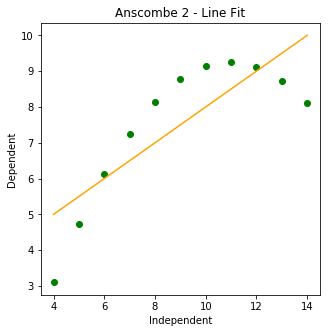

In [16]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y2'],'go')
pl.plot(df['x'], OLS1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Dependent')
pl.title('Anscombe 2 - Line Fit');

## OLS quadratic fit  y2~x^2 + x

In [17]:
OLS2_y2 = smf.ols(formula='y2 ~ x2 + x',data=df).fit()
OLS2_y2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        20:33:13   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.000        -6.006    -5.986
x2            -0.1267   5.71e-05  -2219.238      0.000        -0.127    -0.127
x              2.7808      0.001   2673.741      0.000         2.778     2.783
==============================================================================
Omnibus:                        2.566   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.697
Skew:                           0.809   Prob(JB):                        0.428
Kurtosis:                       1.959   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

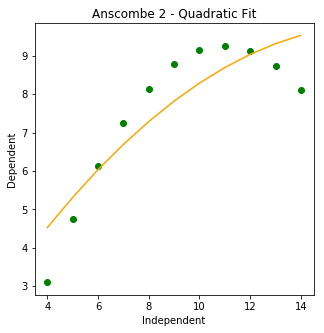

In [18]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y2'],'go')
pl.plot(df['x'], OLS2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Dependent')
pl.title('Anscombe 2 - Quadratic Fit');

# Compare the models with the LR ratio test

In [19]:
OLS2_y2.compare_lr_test(OLS1)

(146.62351447722898, 9.4849169639049082e-34, 1.0)

In [20]:
y2_lr = OLS2_y2.compare_lr_test(OLS1)

In [21]:
print('degree of freedom: %f' %y2_lr[2])
print('LR Stat: %f' %y2_lr[0])
print('p-value: %f' %y2_lr[1])

degree of freedom: 1.000000
LR Stat: 146.623514
p-value: 0.000000


At a significance level of 0.05, the Chi-Square statistic with 1 degree of freedom is 3.841. The LR stat is 146.634380, which is much higher than 3.841. This means that the p-value is less than 0.05, so we can reject the null hypothesis that the restricted model (linear fit) is a better model than the alternative model (quadratic fit), i.e. the better model is the quadratic model. Alternatively, we can just look at the p-value of 0.000000 and conclude that since the p-value < 0.05, we can reject the null hypothesis.

### Obtaining LR from OLS Regression Result Tables

Equation of LR:
    
    LR = -2 log (Likelihood_restricted / likelihood_complex)
    
or equivalently

    LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

In [22]:
OLS1_y2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00218
Time:                        20:33:13   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.026         0.455     5.547
x              0.5000      0.118      4.239      0.002         0.233     0.767
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.108
Skew:                          -0.567   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
LR_y1 = (-2) * (OLS1.llf - OLS2.llf)
LR_y1

0.70794919019374447

In [24]:
print('First Anscombe Distribution')
print('Manual Calculation: %f' %LR_y1)
print('LR Stat: %f' %y1_lr[0])

First Anscombe Distribution
Manual Calculation: 0.707949
LR Stat: 0.707949


P-value will be between 0.10 and 0.90.

In [25]:
LR_y2 = (-2) * (OLS1_y2.llf - OLS2_y2.llf)
LR_y2

146.63437980392047

In [26]:
print('Second Anscombe Distribution')
print('Manual Calculation: %f' %LR_y2)
print('LR Stat: %f' %y2_lr[0])

Second Anscombe Distribution
Manual Calculation: 146.634380
LR Stat: 146.623514


P-value will be less than 0.01.